In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize as spo

In [5]:
rel = yf.download('RELIANCE.NS','2022-01-01','2022-12-30')
tms = yf.download('TATAMOTORS.NS', '2022-01-01','2022-12-30')
zom = yf.download('ZOMATO.NS', '2022-01-01','2022-12-30')
hdf = yf.download('HDFC.NS', '2022-01-01','2022-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
# All closed prices
val_mat = np.column_stack([rel['Close'].values, tms['Close'].values, zom['Close'].values, hdf['Close'].values])
data = pd.DataFrame(val_mat, index= rel.index, columns= ['rel', 'tms', 'zom', 'hdf'])

In [20]:
data.head()

,rel,tms,zom,hdf
Date,,,,
2022-01-03,2403.850098,497.600006,141.350006,2636.399902
2022-01-04,2458.100098,489.600006,138.350006,2675.300049
2022-01-05,2469.600098,489.750000,133.949997,2673.649902
2022-01-06,2416.500000,488.850006,130.000000,2620.399902
2022-01-07,2436.000000,490.600006,129.250000,2596.699951


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-01-03 to 2022-12-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rel     247 non-null    float64
 1   tms     247 non-null    float64
 2   zom     247 non-null    float64
 3   hdf     247 non-null    float64
dtypes: float64(4)
memory usage: 9.6 KB


In [24]:
normalised = data/ data.iloc[0]

In [31]:
alloc_ratio = normalised*[0.4, 0.4, 0.1, 0.1]

In [27]:
total_fund = 100000

In [32]:
alloc = normalised*alloc_ratio
pos_val = alloc*total_fund
port_val = pos_val.sum(axis= 1)    

In [33]:
port_val

Date
2022-01-03    100000.000000
2022-01-04    100427.278879
2022-01-05    100230.916464
2022-01-06     97365.235356
2022-01-07     98021.931407
                  ...      
2022-12-23     77804.897420
2022-12-26     79932.036042
2022-12-27     81910.741898
2022-12-28     81628.740815
2022-12-29     80984.180239
Length: 247, dtype: float64

In [35]:
daily_return = port_val.pct_change().dropna()
daily_return

Date
2022-01-04    0.004273
2022-01-05   -0.001955
2022-01-06   -0.028591
2022-01-07    0.006745
2022-01-10    0.028270
                ...   
2022-12-23   -0.061848
2022-12-26    0.027339
2022-12-27    0.024755
2022-12-28   -0.003443
2022-12-29   -0.007896
Length: 246, dtype: float64

In [38]:
sharp_ratio = daily_return.mean()/ daily_return.std()
sharp_ratio

-0.010169394358104407

In [52]:
def error_function(alloc_ratio):
    alloc = normalised*alloc_ratio
    pos_val = alloc*total_fund
    port_val = pos_val.sum(axis= 1)    
    daily_return = port_val.pct_change().dropna()
    sharp_ratio = daily_return.mean()/ daily_return.std()
    return -sharp_ratio

In [42]:
init_alloc = [0.4, 0.4, 0.1, 0.1]

In [47]:
def con1(t):
    return np.sum(t) - 1

In [53]:
cons = [{'type':'eq', 'fun': con1}]

In [54]:
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [55]:
result = spo.minimize(error_function, init_alloc, method= 'SLSQP', constraints= cons, bounds= bounds)

In [56]:
result.x

array([1.00000000e+00, 0.00000000e+00, 2.28983499e-16, 1.98452366e-15])

<AxesSubplot: xlabel='Date'>

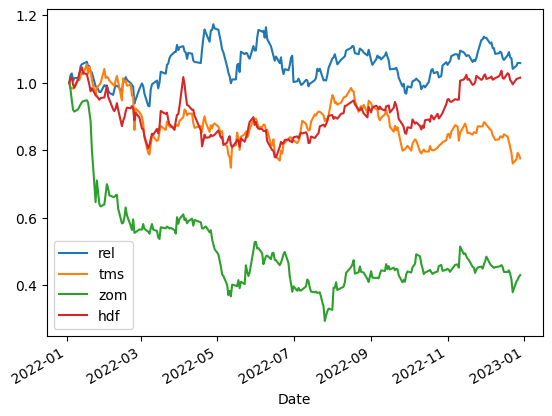

In [62]:
normalised.plot()

<AxesSubplot: xlabel='Date'>

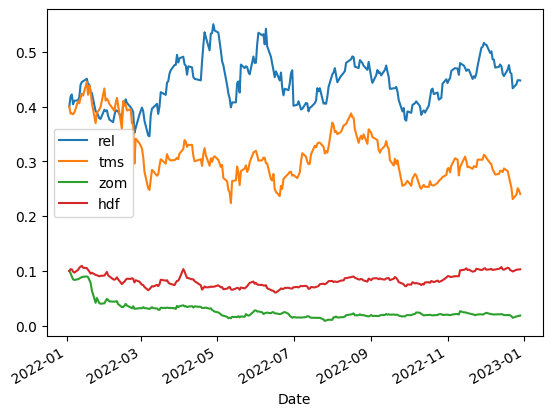

In [63]:
alloc.plot()

<AxesSubplot: xlabel='Date'>

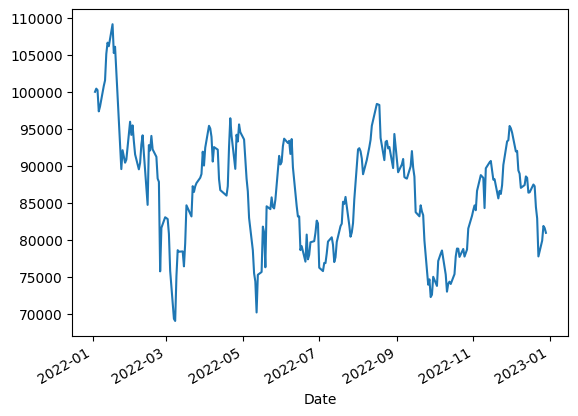

In [64]:
port_val.plot()


In [68]:
alloc_f = normalised*result.x
pos_val_f = alloc_f*total_fund
port_val_f = pos_val_f.sum(axis= 1)    

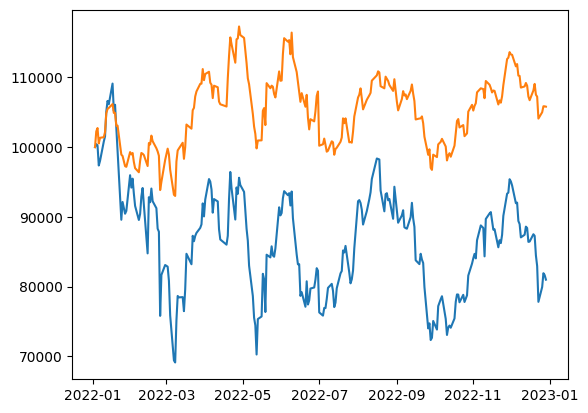

In [69]:
plt.plot(port_val)
plt.plot(port_val_f)